In [1]:
!pip install yolov5==6.0.6
!pip install pydub==0.25.1
!pip install nnAudio==0.3.1

In [2]:
!git clone https://github.com/RedbirdTaiwan/silic-bat

Cloning into 'silic-bat'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [3]:
%cd 'silic-bat'
!git pull
import pandas as pd
from silicbat import SilicBat, clean_multi_boxes, draw_labels
import pandas as pd, os
from IPython.display import Image

/content/silic-bat
Already up to date.


/usr/local/lib/python3.7/dist-packages/nnAudio/Spectrogram.py:7: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  category=Warning,


In [4]:
model = SilicBat()

STFT kernels created, time used = 0.1293 seconds
STFT kernels created, time used = 0.0300 seconds
STFT filter created, time used = 0.0039 seconds
Mel filter created, time used = 0.0040 seconds


Origional audio: channel = 1, sample_rate = 256000 Hz, sample_size = 512600, duration = 2.00234375 s
Standarized audio: channel = 1, sample_rate = 320000 Hz, sample_size = 640749, duration = 2.002340625 s
Spectrogram was saved to sample/linear/sample01.png.


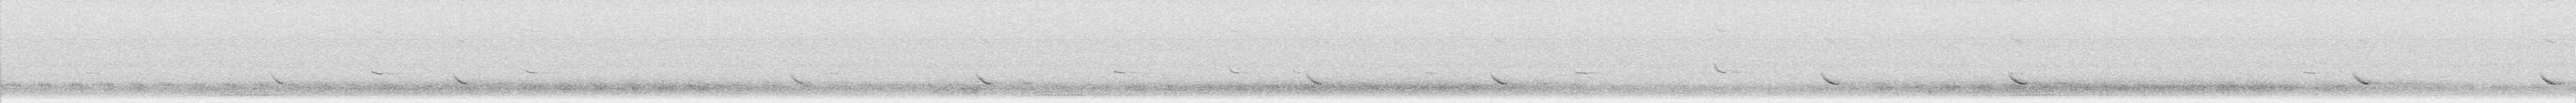

In [17]:
model.audio('sample/sample01.wav')
spect_linear = model.tfr()
Image(spect_linear)

In [18]:
labels = model.detect(weights='model/exp/best.pt', step=64, soundclasses=[], conf_thres=0.1)

Spectrogram was saved to sample/rainbow/sample01.png.


In [19]:
df = pd.DataFrame(labels[1:],columns=labels[0]).sort_values('time_begin')
print(df)

                   file  time_begin  time_end  freq_low  freq_high  classid  \
0   sample/sample01.wav         209       222     27960      49798      520   
2   sample/sample01.wav         210       222     27960      49798      520   
1   sample/sample01.wav         288       298     42986      51834      498   
3   sample/sample01.wav         288       298     42986      51834      498   
4   sample/sample01.wav         350       364     27960      50468      520   
6   sample/sample01.wav         350       364     27960      50468      520   
7   sample/sample01.wav         408       418     45350      52530      498   
8   sample/sample01.wav         408       418     44747      51834      520   
5   sample/sample01.wav         408       418     44747      51834      520   
9   sample/sample01.wav         613       625     28340      53236      520   
10  sample/sample01.wav         613       626     28340      53951      520   
11  sample/sample01.wav         757       768     26

In [20]:
newlabels = clean_multi_boxes(labels)
print(newlabels)

                   file  time_begin  time_end  freq_low  freq_high  classid  \
0   sample/sample01.wav         209       222     27960      49798      520   
1   sample/sample01.wav         288       298     42986      51834      498   
2   sample/sample01.wav         350       364     27960      50468      520   
3   sample/sample01.wav         408       418     44747      51834      520   
4   sample/sample01.wav         408       418     45350      52530      498   
5   sample/sample01.wav         613       626     28340      53951      520   
6   sample/sample01.wav         757       771     26849      51146      520   
7   sample/sample01.wav         864       875     44153      51834      520   
8   sample/sample01.wav         953       964     44747      64159      498   
9   sample/sample01.wav        1014      1029     26489      60025      520   
10  sample/sample01.wav        1157      1171     28340      50468      520   
11  sample/sample01.wav        1223      1234     43

Spectrogram was saved to sample/linear/sample01.png.
sample/labels/sample01.png saved


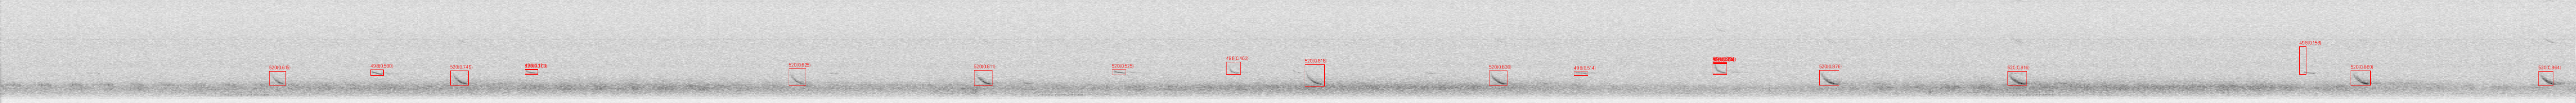

In [21]:
label_img = draw_labels(model, newlabels)
Image(label_img)